# Telcom Customer Churning EDA


In this Data set each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The raw data contains 7043 rows (customers) and 21 columns (features). 

The “Churn” column is our target.


### Step 1


# Data Wrangling

importing the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
df=pd.read_csv("telco-customer-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes





# 1. Identify and handle missing values


In [2]:
df.replace(["?"," "], np.nan, inplace = True)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

Based on the summary above, each column has 7043  rows of data, only one column containing missing data:

    "TotalCharges"           : 11 missing data

In [4]:
missing_data["TotalCharges"].value_counts()

False    7032
True       11
Name: TotalCharges, dtype: int64

### Handling missing data

**Drop the whole row:**

    "TotalCharges": 11 missing data, simply delete the whole row

* Reason*:
It's hard to replace the TotalCharge, neither the mean value nor the frequancy could work in this case.
Also the missing data is quite small comparing to the dataset. 

In [5]:
df.dropna(subset=['TotalCharges'],axis=0, inplace=True)

Now we have 7032 rows after droping the 11 rows.

-


# Correct data format

The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

-



# Data Normalization


### Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling variable so the variable values range from 0 to 1 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
# replace (origianl value) by (original value)/(maximum value)
df['tenure'] = df['tenure']/df['tenure'].max()
df['MonthlyCharges'] = df['MonthlyCharges']/df['MonthlyCharges'].max()
df['TotalCharges'] = df['TotalCharges']/df['TotalCharges'].max()

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.450303,0.545669,0.262908
std,0.368844,0.340906,0.253356,0.261004
min,0.000000,0.013889,0.153684,0.002165
25%,0.000000,0.125000,0.299684,0.046224
50%,0.000000,0.402778,0.592421,0.160910
75%,0.000000,0.763889,0.756737,0.436940
max,1.000000,1.000000,1.000000,1.000000


# Indicator variable (or dummy variable)

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 

In [12]:
df = df.iloc[:,1:]
#Convertin the dependant variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)


In [13]:
dummies=pd.get_dummies(df)
#dummies[['Churn','Internet_service','DSL','No','Fiber optic']].corr()


In [14]:
dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.251368,0.003437,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.472222,0.479579,0.217564,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.027778,0.453474,0.012453,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.625000,0.356211,0.211951,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.027778,0.595368,0.017462,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Analyzing Individual Feature Patterns using Visualization

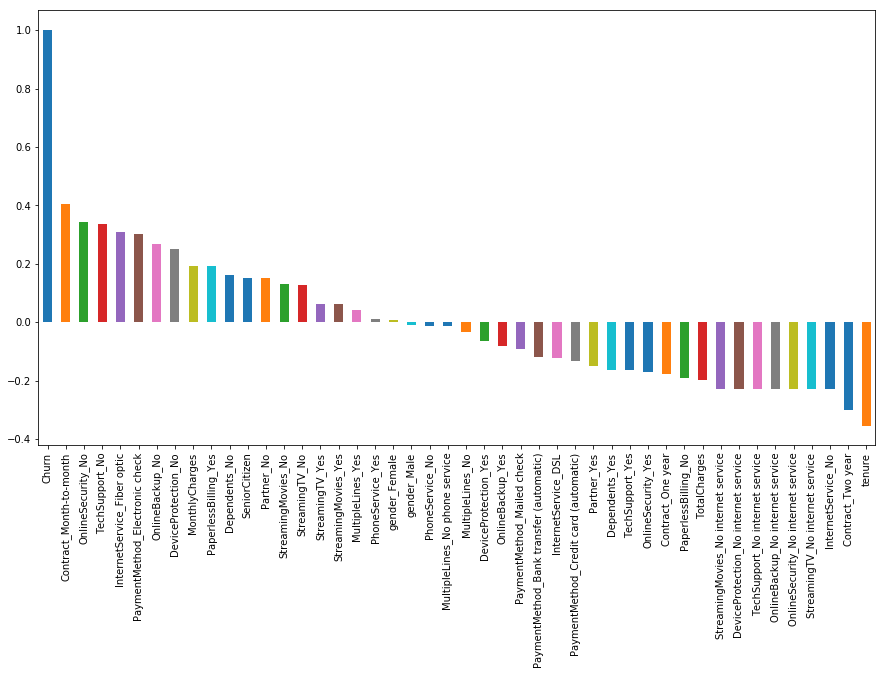

In [18]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')





Obeviously month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.


In [21]:
#count of online services availed
dummies['Count_OnlineServices'] = (dummies[['OnlineSecurity_Yes', 'DeviceProtection_Yes', 'StreamingMovies_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'OnlineBackup_Yes']]).sum(axis=1)

Text(0.5,0,'Number of Online Services')

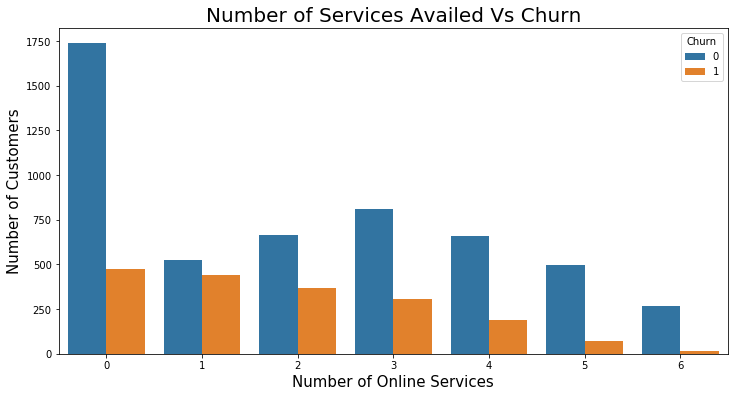

In [23]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Count_OnlineServices', hue='Churn', data=dummies)
ax.set_title('Number of Services Availed Vs Churn', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_xlabel('Number of Online Services', fontsize=15)

As we can see Customers who does not avail any internet services are churning least,  Customers who are availing just one Online Service are churning highest. As the number of online services increases beyond one service, the less is the proportion of churn

Text(0.5,1,'Churn By Gender')

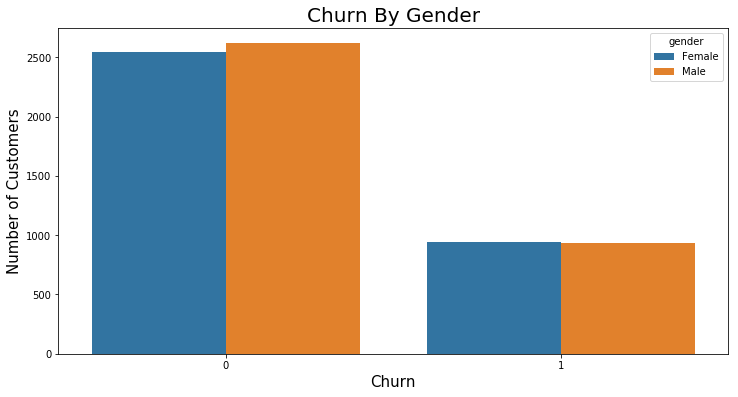

In [30]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="gender", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn By Gender', fontsize=20)

Text(0.5,1,'Churn Among Senior Citizens vs Non Senior')

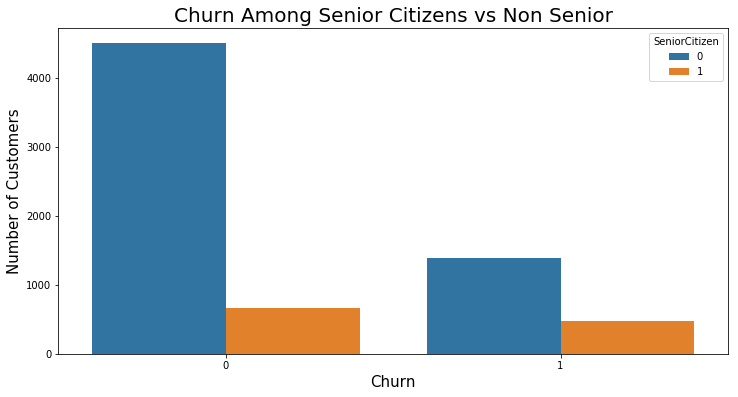

In [29]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="SeniorCitizen", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn Among Senior Citizens vs Non Senior', fontsize=20)

Senior Citizens are churning in greater proportion, almost 42% of Sr.Citizens churn compared to about 25% of non Sr.Citizens

Text(0.5,0,'Churn')

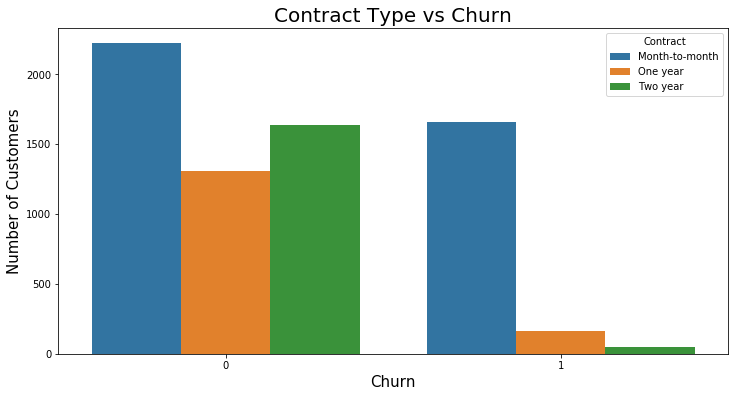

In [26]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="Contract", data=df);
ax.set_title('Contract Type vs Churn', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

Customers with Month-to-Month contract are churning more, while two year contract customers are churning least 

Text(0.5,1,'Churn by Payment Method')

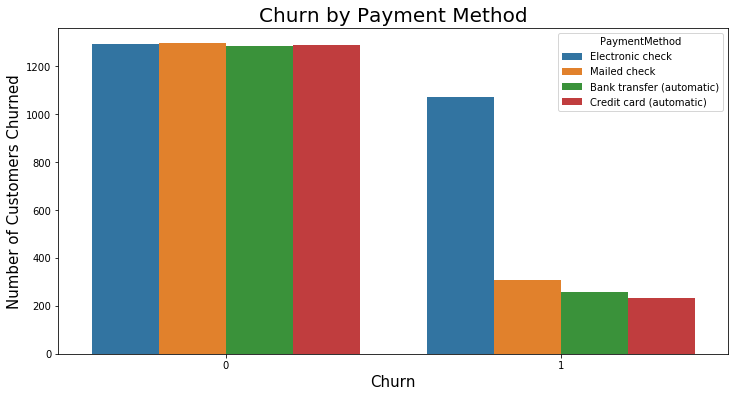

In [27]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="PaymentMethod", data=df);
ax.set_ylabel('Number of Customers Churned', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn by Payment Method', fontsize=20)

Customers with Electronic Check as mode of payment are churning in higher proportion 

Text(0.5,1,'Churn By Internet Service Type')

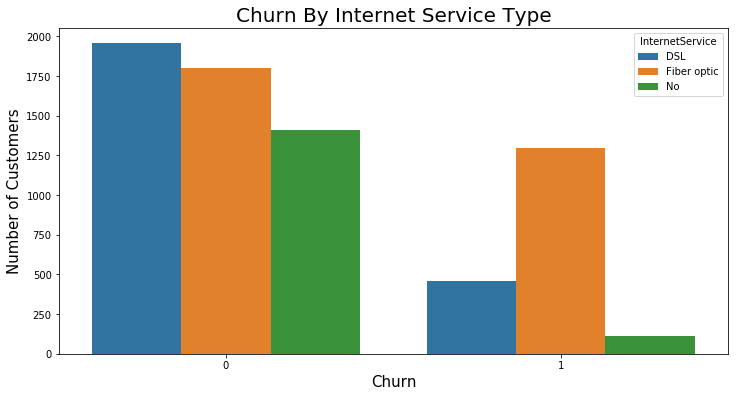

In [32]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="InternetService", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn By Internet Service Type', fontsize=20)